In [1]:
# https://medium.com/@HeeebsInc/using-machine-learning-to-predict-daily-fantasy-basketball-scores-part-i-811de3c54a98

# https://medium.com/fun-with-data-and-stats/drafting-a-fantasy-basketball-team-c94967464908

In [2]:
# needed libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

# URL to scrape
url = "https://www.basketball-reference.com/playoffs/"

# collect HTML data
html = urlopen(url)
        
# create beautiful soup object from HTML
soup = BeautifulSoup(html, features="lxml")

# use getText()to extract the headers into a list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[1].findAll('th')]

# get rows from table
rows = soup.findAll('tr')[2:]
rows_data = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]

# if you print row_data here you'll see an empty row
# so, remove the empty row
rows_data.pop(20)
# for simplicity subset the data for only 39 seasons
rows_data = rows_data[0:38]

# we're missing a column for years
# add the years into rows_data
last_year = 2020
for i in range(0, len(rows_data)):
    rows_data[i].insert(0, last_year)
    last_year -=1
    
# create the dataframe
nba_finals = pd.DataFrame(rows_data, columns = headers)
# export dataframe to a CSV 
nba_finals.to_csv("nba_finals_history.csv", index=False)

# Web Scraper

In [3]:
# https://github.com/klaudius1D/ShootersShoot/tree/main

In [4]:
import pandas as pd
import requests
import os
from bs4 import BeautifulSoup

# settings
pd.set_option('display.max_columns', None)

In [5]:
# Set Playoff Years from 2020 to 2023
years = list(range(2020, 2024))

# {} used to vary dates in loop
url_start = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"

# Replace brackets with specific years based on list
for year in years:
    url = url_start.format(year)
    data = requests.get(url)

    # Create HTML files for each year
    with open("topPicksHTML/Playoffs-{}_topPicks.html".format(year), "wb") as f:
        f.write(data.content)

In [6]:
# using a loop, parse each html for each year in years list
dfs = []
for year in years:
    url = url_start.format(year)
    data = requests.get(url)
    soup = BeautifulSoup(data.content, "html.parser")
    topPicks_table = soup.find("table", {"id": "per_game_stats"})
    topPicks_df = pd.read_html(str(topPicks_table))[0]
    topPicks_df = topPicks_df[topPicks_df.Rk != "Rk"]
    topPicks_df["Year"] = year

    dfs.append(topPicks_df)

    # Save all contents into one csv files into new folder called topPicksCSV
    topPicks_df.to_csv("topPicksCSV/Playoffs-{}_topPicks.csv".format(year), index=False)

In [7]:
# combine all dataframes into one
df = pd.concat(dfs)
df.to_csv("topPicksCSV/Playoffs-Master_topPicks.csv", index=False)

In [8]:
# check contents of dataframe, ensure all years are included
df.head()
df.tail()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
700,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,.545,0.1,0.6,.176,1.9,3.0,.622,.561,0.3,0.5,.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4,2023
701,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,.429,2.1,6.3,.335,6.1,12.7,.476,.485,7.8,8.8,.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2,2023
702,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,.593,0.3,0.8,.429,1.4,2.2,.650,.648,0.6,0.7,.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4,2023
703,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,.627,0.0,0.1,.000,2.5,3.8,.649,.627,1.6,2.3,.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5,2023
704,539,Ivica Zubac,C,25,LAC,76,76,28.6,4.3,6.8,.634,0.0,0.0,.000,4.3,6.7,.637,.634,2.2,3.1,.697,3.1,6.8,9.9,1.0,0.4,1.3,1.5,2.9,10.8,2023


# Testing

In [9]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,.592,0.0,0.0,.333,4.5,7.5,.594,.593,1.9,3.2,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,2020
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,.557,0.0,0.2,.143,6.1,10.8,.564,.558,3.7,5.3,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,2020
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,.493,1.2,3.0,.389,6.2,12.0,.519,.532,3.0,3.6,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,2020
3,4,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,.500,0.0,0.0,NaN,0.5,1.0,.500,.500,0.0,0.0,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,2020
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,.368,1.0,2.8,.346,1.1,2.8,.391,.455,0.5,0.8,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,2020


In [10]:
df.info()

# NEED TO CONVERT THESE COLUMNS TO INT

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2847 entries, 0 to 704
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      2847 non-null   object
 1   Player  2847 non-null   object
 2   Pos     2847 non-null   object
 3   Age     2847 non-null   object
 4   Tm      2847 non-null   object
 5   G       2847 non-null   object
 6   GS      2847 non-null   object
 7   MP      2847 non-null   object
 8   FG      2847 non-null   object
 9   FGA     2847 non-null   object
 10  FG%     2825 non-null   object
 11  3P      2847 non-null   object
 12  3PA     2847 non-null   object
 13  3P%     2681 non-null   object
 14  2P      2847 non-null   object
 15  2PA     2847 non-null   object
 16  2P%     2800 non-null   object
 17  eFG%    2825 non-null   object
 18  FT      2847 non-null   object
 19  FTA     2847 non-null   object
 20  FT%     2651 non-null   object
 21  ORB     2847 non-null   object
 22  DRB     2847 non-null   o

In [11]:
for column in df.columns:
    try:
        df[column] = pd.to_numeric(df[column], errors='raise').fillna(0).astype(float)
    except (ValueError, TypeError):
        pass  # Ignore columns that cannot be converted

In [12]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1.0,Steven Adams,C,26.0,OKC,63.0,63.0,26.7,4.5,7.6,0.592,0.0,0.0,0.333,4.5,7.5,0.594,0.593,1.9,3.2,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,2020.0
1,2.0,Bam Adebayo,PF,22.0,MIA,72.0,72.0,33.6,6.1,11.0,0.557,0.0,0.2,0.143,6.1,10.8,0.564,0.558,3.7,5.3,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,2020.0
2,3.0,LaMarcus Aldridge,C,34.0,SAS,53.0,53.0,33.1,7.4,15.0,0.493,1.2,3.0,0.389,6.2,12.0,0.519,0.532,3.0,3.6,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,2020.0
3,4.0,Kyle Alexander,C,23.0,MIA,2.0,0.0,6.5,0.5,1.0,0.500,0.0,0.0,0.000,0.5,1.0,0.500,0.500,0.0,0.0,0.000,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,2020.0
4,5.0,Nickeil Alexander-Walker,SG,21.0,NOP,47.0,1.0,12.6,2.1,5.7,0.368,1.0,2.8,0.346,1.1,2.8,0.391,0.455,0.5,0.8,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,2020.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2847 entries, 0 to 704
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      2847 non-null   float64
 1   Player  2847 non-null   object 
 2   Pos     2847 non-null   object 
 3   Age     2847 non-null   float64
 4   Tm      2847 non-null   object 
 5   G       2847 non-null   float64
 6   GS      2847 non-null   float64
 7   MP      2847 non-null   float64
 8   FG      2847 non-null   float64
 9   FGA     2847 non-null   float64
 10  FG%     2847 non-null   float64
 11  3P      2847 non-null   float64
 12  3PA     2847 non-null   float64
 13  3P%     2847 non-null   float64
 14  2P      2847 non-null   float64
 15  2PA     2847 non-null   float64
 16  2P%     2847 non-null   float64
 17  eFG%    2847 non-null   float64
 18  FT      2847 non-null   float64
 19  FTA     2847 non-null   float64
 20  FT%     2847 non-null   float64
 21  ORB     2847 non-null   float64
 22  D

# Clean for Fantasy

In [14]:
clean_fantasy = [
    "Player", 
    "MP", 
    "FG%",
    "FT%",
    "3P",
    "PTS",
    "TRB", 
    "AST",
    "STL",
    "BLK",
    "TOV",

]

In [15]:
per_30_stats = df[clean_fantasy]

In [16]:
per_30_stats[["PTS", "TRB", "AST", "STL", "BLK", "TOV"]] = df[["PTS", "TRB", "AST", "STL", "BLK", "TOV"]].div(df['MP'], axis = 0).multiply(30)

C:\Users\nehcr\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [17]:
per_30_stats.head()

,Player,MP,FG%,FT%,3P,PTS,TRB,AST,STL,BLK,TOV
0,Steven Adams,26.7,0.592,0.582,0.0,12.247191,10.449438,2.584270,0.898876,1.235955,1.685393
1,Bam Adebayo,33.6,0.557,0.691,0.0,14.196429,9.107143,4.553571,0.982143,1.160714,2.500000
2,LaMarcus Aldridge,33.1,0.493,0.827,1.2,17.129909,6.706949,2.175227,0.634441,1.450151,1.268882
3,Kyle Alexander,6.5,0.500,0.000,0.0,4.615385,6.923077,0.000000,0.000000,0.000000,2.307692
4,Nickeil Alexander-Walker,12.6,0.368,0.676,1.0,13.571429,4.285714,4.523810,0.952381,0.476190,2.619048


In [18]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1.0,Steven Adams,C,26.0,OKC,63.0,63.0,26.7,4.5,7.6,0.592,0.0,0.0,0.333,4.5,7.5,0.594,0.593,1.9,3.2,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,2020.0
1,2.0,Bam Adebayo,PF,22.0,MIA,72.0,72.0,33.6,6.1,11.0,0.557,0.0,0.2,0.143,6.1,10.8,0.564,0.558,3.7,5.3,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,2020.0
2,3.0,LaMarcus Aldridge,C,34.0,SAS,53.0,53.0,33.1,7.4,15.0,0.493,1.2,3.0,0.389,6.2,12.0,0.519,0.532,3.0,3.6,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,2020.0
3,4.0,Kyle Alexander,C,23.0,MIA,2.0,0.0,6.5,0.5,1.0,0.500,0.0,0.0,0.000,0.5,1.0,0.500,0.500,0.0,0.0,0.000,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,2020.0
4,5.0,Nickeil Alexander-Walker,SG,21.0,NOP,47.0,1.0,12.6,2.1,5.7,0.368,1.0,2.8,0.346,1.1,2.8,0.391,0.455,0.5,0.8,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,2020.0


In [19]:
df['Year'].value_counts()

2022.0    812
2021.0    705
2023.0    679
2020.0    651
Name: Year, dtype: int64

In [20]:
df['Year'].value_counts().keys()

Float64Index([2022.0, 2021.0, 2023.0, 2020.0], dtype='float64')

In [21]:
df[df['Year'] == 2021.0]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1.0,Precious Achiuwa,PF,21.0,MIA,61.0,4.0,12.1,2.0,3.7,0.544,0.0,0.0,0.000,2.0,3.7,0.546,0.544,0.9,1.8,0.509,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,2021.0
1,2.0,Jaylen Adams,PG,24.0,MIL,7.0,0.0,2.6,0.1,1.1,0.125,0.0,0.3,0.000,0.1,0.9,0.167,0.125,0.0,0.0,0.000,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3,2021.0
2,3.0,Steven Adams,C,27.0,NOP,58.0,58.0,27.7,3.3,5.3,0.614,0.0,0.1,0.000,3.3,5.3,0.620,0.614,1.0,2.3,0.444,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,2021.0
3,4.0,Bam Adebayo,C,23.0,MIA,64.0,64.0,33.5,7.1,12.5,0.570,0.0,0.1,0.250,7.1,12.4,0.573,0.571,4.4,5.5,0.799,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,2021.0
4,5.0,LaMarcus Aldridge,C,35.0,TOT,26.0,23.0,25.9,5.4,11.4,0.473,1.2,3.1,0.388,4.2,8.3,0.505,0.525,1.6,1.8,0.872,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,536.0,Delon Wright,PG,28.0,SAC,27.0,8.0,25.8,3.9,8.3,0.462,1.2,3.1,0.398,2.6,5.3,0.500,0.536,1.1,1.3,0.833,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021.0
727,537.0,Thaddeus Young,PF,32.0,CHI,68.0,23.0,24.3,5.4,9.7,0.559,0.2,0.7,0.267,5.3,9.1,0.580,0.568,1.0,1.7,0.628,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021.0
728,538.0,Trae Young,PG,22.0,ATL,63.0,63.0,33.7,7.7,17.7,0.438,2.2,6.3,0.343,5.6,11.3,0.491,0.499,7.7,8.7,0.886,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021.0
729,539.0,Cody Zeller,C,28.0,CHO,48.0,21.0,20.9,3.8,6.8,0.559,0.1,0.6,0.143,3.7,6.2,0.598,0.565,1.8,2.5,0.714,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021.0


In [22]:
# Initialize an empty dictionary to store subsets
year_subsets = {}

# Get unique years from the 'Year' column
unique_years = df['Year'].unique()

# Iterate through unique years and create subsets
for year in unique_years:
    year_subsets[year] = df[df['Year'] == year]

In [23]:
year_subsets[2023].describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.0
mean,265.976436,26.025037,43.337261,20.069219,19.464212,3.249337,6.921060,0.462190,0.996613,2.783063,0.318141,2.254934,4.138439,0.527147,0.532948,1.366568,1.768630,0.711576,0.842268,2.620324,3.461708,2.011782,0.601767,0.370545,1.067305,1.660825,8.859057,2023.0
std,154.956296,4.325709,24.729145,25.766359,9.415320,2.362501,4.795565,0.116682,0.862033,2.209284,0.139918,1.906812,3.380376,0.147627,0.114166,1.478315,1.793762,0.224774,0.731867,1.715881,2.281077,1.891335,0.392063,0.367465,0.799478,0.770299,6.630944,0.0
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2023.0
25%,132.500000,23.000000,22.000000,0.000000,12.150000,1.500000,3.400000,0.415000,0.300000,1.000000,0.286000,0.900000,1.700000,0.484000,0.496000,0.400000,0.600000,0.667000,0.300000,1.400000,1.800000,0.800000,0.300000,0.100000,0.500000,1.200000,4.100000,2023.0
50%,264.000000,25.000000,45.000000,6.000000,18.800000,2.600000,5.700000,0.454000,0.800000,2.400000,0.346000,1.600000,3.100000,0.535000,0.537000,0.900000,1.200000,0.760000,0.700000,2.300000,3.000000,1.300000,0.500000,0.300000,0.900000,1.600000,6.900000,2023.0
75%,399.500000,29.000000,65.500000,36.500000,27.550000,4.200000,9.200000,0.505000,1.500000,4.150000,0.388000,3.000000,5.550000,0.594000,0.579000,1.700000,2.300000,0.841000,1.100000,3.400000,4.500000,2.700000,0.800000,0.500000,1.400000,2.200000,11.550000,2023.0
max,539.000000,42.000000,83.000000,83.000000,41.000000,11.200000,22.200000,1.000000,4.900000,11.400000,1.000000,10.500000,17.800000,1.000000,1.000000,10.000000,12.300000,1.000000,5.100000,9.600000,12.500000,10.700000,3.000000,3.000000,4.100000,5.000000,33.100000,2023.0


In [24]:
cleaned_2021 = year_subsets[2021][year_subsets[2021]["MP"] > 15][clean_fantasy]

In [25]:
cleaned_2021

,Player,MP,FG%,FT%,3P,PTS,TRB,AST,STL,BLK,TOV
2,Steven Adams,27.7,0.614,0.444,0.0,7.6,8.9,1.9,0.9,0.7,1.3
3,Bam Adebayo,33.5,0.570,0.799,0.0,18.7,9.0,5.4,1.2,1.0,2.6
4,LaMarcus Aldridge,25.9,0.473,0.872,1.2,13.5,4.5,1.9,0.4,1.1,1.0
5,LaMarcus Aldridge,25.9,0.464,0.838,1.3,13.7,4.5,1.7,0.4,0.9,1.0
6,LaMarcus Aldridge,26.0,0.521,1.000,0.8,12.8,4.8,2.6,0.6,2.2,1.4
...,...,...,...,...,...,...,...,...,...,...,...
726,Delon Wright,25.8,0.462,0.833,1.2,10.0,3.9,3.6,1.6,0.4,1.3
727,Thaddeus Young,24.3,0.559,0.628,0.2,12.1,6.2,4.3,1.1,0.6,2.0
728,Trae Young,33.7,0.438,0.886,2.2,25.3,3.9,9.4,0.8,0.2,4.1
729,Cody Zeller,20.9,0.559,0.714,0.1,9.4,6.8,1.8,0.6,0.4,1.1


# Cleaning

In [28]:
clean_df = df[df['MP'] >= 15]

# Frequency Distributions

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

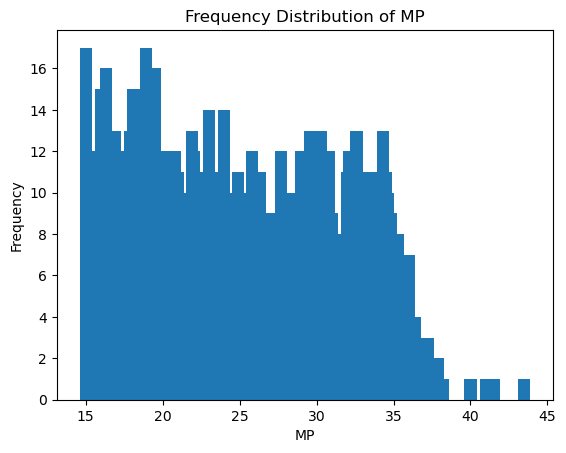

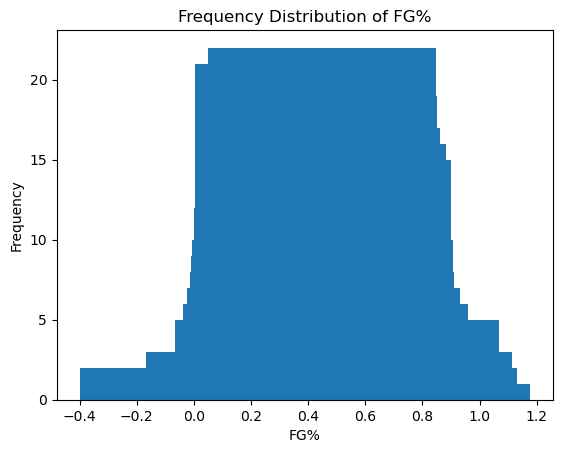

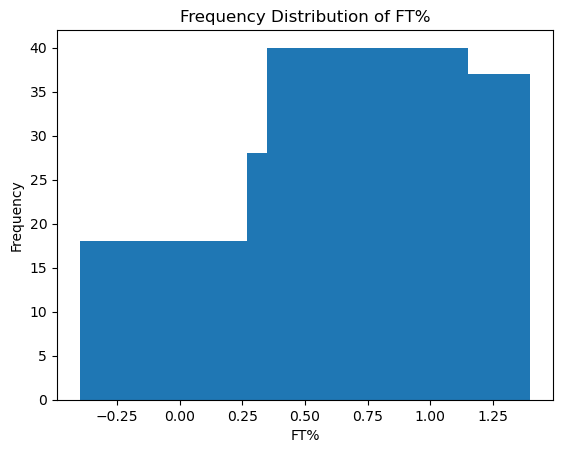

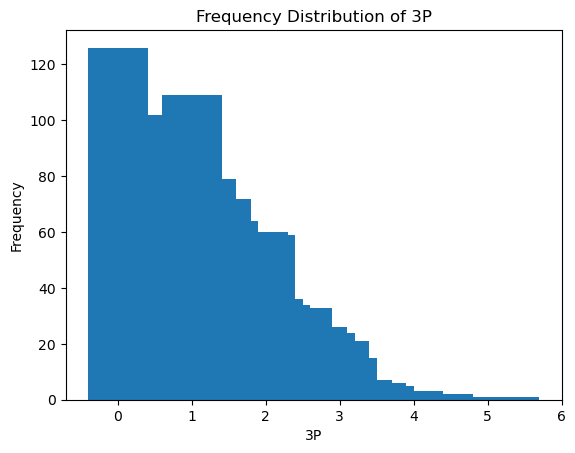

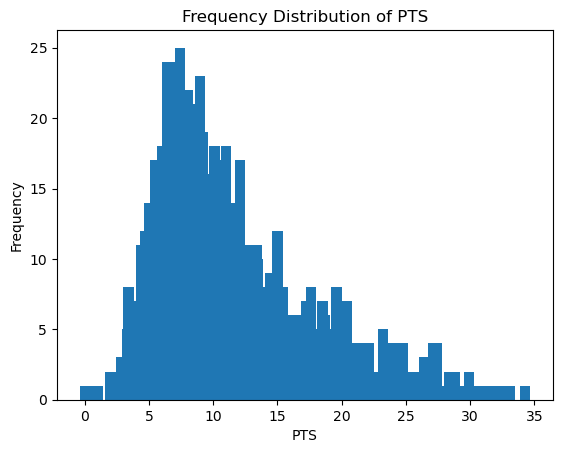

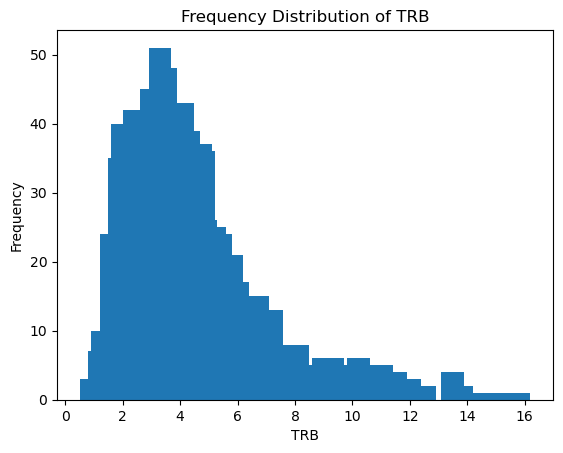

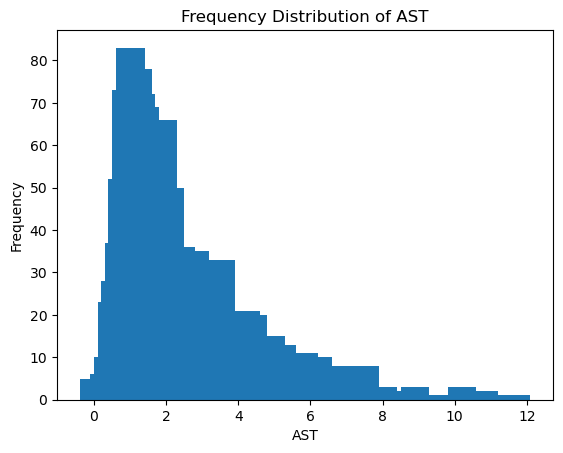

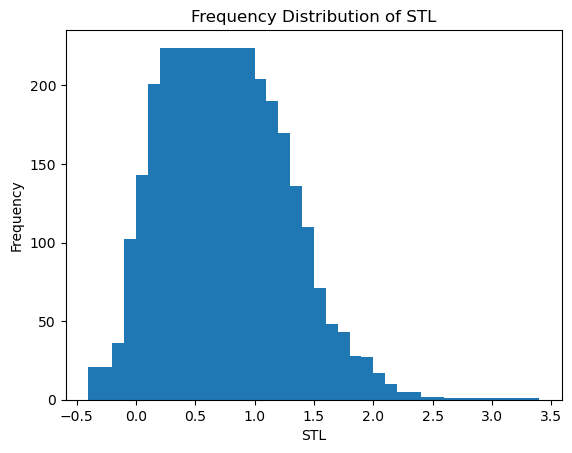

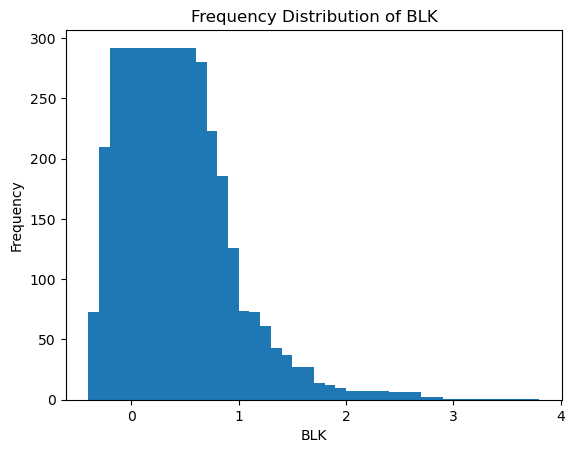

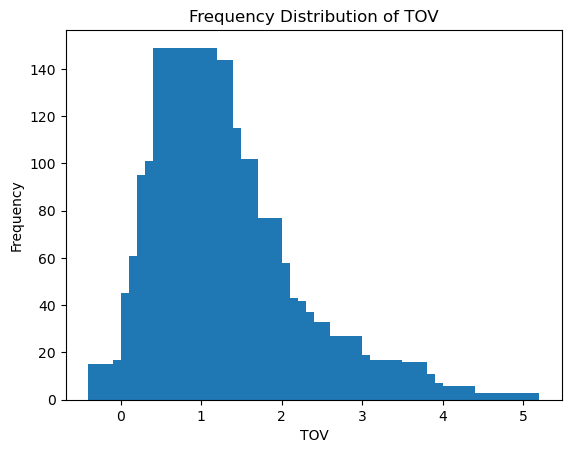

In [30]:
# List of column names to visualize
columns_to_visualize = ['MP', 'FG%', 'FT%', '3P', 'PTS', 'TRB', 'AST', 'STL', 'BLK', 'TOV']

# Create and display frequency distribution plots for each column
for column in columns_to_visualize:
    freq = clean_df[column].value_counts().sort_index()

    plt.bar(freq.index, freq.values)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Frequency Distribution of {column}')
    plt.show()

# Correlation Analysis

### FG%

In [54]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['FG%'] = pd.to_numeric(df['FG%'], errors='coerce')

fg_correlation = df.groupby('Year')['FG%'].corr(df['Year'])
fg_correlation

Year
2020.0    0.006143
2021.0   -0.006279
2022.0    0.003274
2023.0    0.004040
Name: FG%, dtype: float64

In [55]:
# need to spend some time reviewing pearson correlation coefficients to truly analyze this

# Improving Z Scores

https://github.com/zer2/Fantasy-Basketball--in-progress-

# Data Cleaning

In [ ]:
import pandas as pd
import numpy as np

# create variables for scoring settings
global pointsScored, totalRebounds, assists, steals, blockedShots, turnovers
pointsScored = 1.0
totalRebounds = 1.2
assists = 1.5
steals = 3.0
blockedShots = 3.0
turnovers = -1.0

In [ ]:
# load Master_topPicks into dataframe
df = pd.read_csv("topPicksCSV/Playoffs-Master_topPicks.csv")

# keep only the columns we need
stats_to_keep = [
    "Player",
    "Pos",
    "Tm",
    "G",
    "MP",
    "TRB",
    "AST",
    "STL",
    "BLK",
    "TOV",
    "PTS",
    "Year",
]
df = df[stats_to_keep]

# capture each player occurences
# df = df.groupby(["Player"]).sum().reset_index()

# if a player has played for multiple years, average their stats across those years
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
df = df.groupby(["Player"])[numeric_cols].mean().reset_index()

# drop year column
df = df.drop("Year", axis=1)

In [ ]:
# create calculated column for fantasy points
df["FantasyPoints"] = (
    df["PTS"] * pointsScored
    + df["TRB"] * totalRebounds
    + df["AST"] * assists
    + df["STL"] * steals
    + df["BLK"] * blockedShots
    + df["TOV"] * turnovers)

#round to the nearest decimal
df = df.round(1)

In [ ]:
# write to csv
df.to_csv("topPicksCSV/Playoffs-Master-Combined_topPicks.csv", index=False)

df